<h1><center>Regressão Linear Multivariada</center></h1>

Importando as bibliotecas:

In [3]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=8)

# 1. Implementação

Funções a serem implementadas no exercício:

In [4]:
# ##############################################################################################
# Esta função deve inicializar os parâmetros do modelo de Regressão Linear, sendo o vetor 
# de coeficientes = {m1, m2, m3, ..., mn} do tamanho da quantidade de atributos (n) e o bias um 
# valor escalar. Os resultados devem ser retornados em forma de tupla: (weights, bias).
# ##############################################################################################
#passo inicial zero


# na dúvida, rever o jupyternb de algebra linear
def initialize_weights_bias(x): #matriz x de entrada
    try:
        (nlines, ncolumns) = x.shape
    except:    
        ncolumns = 1

    # AJUSTE O TRECHO ABAIXO
    # não inicializar com zeros (0)
    #inicializar com 1 ou nº randomico
    # --------------------------
    #weights = np.random.randint(1,10, size=ncolumns)
    weights = np.ones(shape = ncolumns)    

    weights = weights.reshape(len(weights), 1)
    
    #bias = np.random.randint(1,10)
    bias = 0 #o bias pode ser zero
    # --------------------------

    return (weights, bias)

In [5]:
# ##############################################################################################
# Esta funcao deve computar a predicao para cada um dos m registros em x, baseado nos coeficien-
# tes em weights e no bias. Utilize a funcao (1) dos slides.
# ##############################################################################################
def predict(x, weights, bias): #weights é o BETA da fórmula e o bias é o a da fórmula (coeficiente aditivo)
    # CALCULE ABAIXO
    # --------------------------
    #return x.dot(... multiplicar x X weights e somar 0 bias
    return x.dot(weights) + bias
    # --------------------------



In [6]:
# ##############################################################################################
# Coloque aqui o trecho de código que vai calcular o custo gerado pelo modelo.
# A variável "y" representa o dado real ocorrido, enquanto "yhat" indica as predições.
# O custo deve ser calculado pelo Método de Mínimos Quadrados. Pode-se assumir que os arrays
# fornecidos como parâmetro são numpy.array, então esta função pode ser implementada com
# 3 linhas de código. Use a funcao (3) dos slides.
# ##############################################################################################
def cost_function(y, yhat): #y é o valor sugerido, valor conhecido, valor REAL; yhat (y^) é o predito
    m = len(y)
    
    # CALCULE J ABAIXO
    loss = y - yhat
    lossSqr = np.square(loss) # com loss ** 2 dava erro quando é multivariado
    # --------------------------
    J = np.sum(lossSqr)  / m
    # --------------------------
    
    #implementação do somatorio da perda
    
    return J


In [14]:
# ##############################################################################################
# O codigo abaixo apresenta alguns trechos destacados, os quais precisam ser corrigos.
# ##############################################################################################
def batch_gradient_descent(x, y, alpha=0.005, iterations=50):
    m = len(y)
    weights, bias = initialize_weights_bias(x)

    for iteration in range(iterations):
        yhat = predict(x, weights, bias)
        #(z, m) = yhat.shape
        yhat = yhat.reshape(m,1)
        
        loss = y - yhat
        wgradient = (-2/m) *  x.T.dot(loss)#função 4
        
        # ATUALIZE OS COEFICIENTES
        # --------------------------
        weights = weights - wgradient * alpha
        # --------------------------
        
        # CALCULE A DERIVADA PARCIAL 
        #  DA FUNCAO J EM RELACAO 
        #  AO BIAS. USE A FUNCAO (5)
        #  DOS SLIDES.
        # --------------------------        
        bgradient = (-2/m) * np.sum(loss)
        # --------------------------
        
        bias = bias - alpha * bgradient

        nyhat = predict(x, weights, bias)
        
        cost = cost_function(y, nyhat)
        print("Gradient descendent iteration %d. Cost = %.8f." %(iteration, cost))

    return weights, bias

### 1.1 Teste aqui seu código:
----------------------------------------------------------------------------------------------------------------------------
1. Inicialização de pesos. Resultados esperados:

In [15]:
# (array([[1.]]), 0)
# (array([[1.],
#        [1.]]), 0)
# (array([[1.],
#        [1.],
#        [1.],
#        [1.]]), 0)

In [16]:
x1 = np.array([0, 0, 0, 0, 0, 0])
x2 = np.matrix('1 2; 3 4')
x3 = np.matrix('11 12 13 14; 21 22 23 24; 31 32 33 34')

parameters = initialize_weights_bias(x1)
print(parameters)

parameters = initialize_weights_bias(x2)
print(parameters)

parameters = initialize_weights_bias(x3)
print(parameters)

(array([[1.]]), 0)
(array([[1.],
       [1.]]), 0)
(array([[1.],
       [1.],
       [1.],
       [1.]]), 0)


----------------------------------------------------------------------------------------------------------------------------
2. Calcule a predição baseado no vetor x e nos parametros.  Resultados esperados:

1.0

[[3.5 6.5]]

[[13.5 23.5 33.5]]

In [17]:
w1 = np.array([0.5])
w2 = np.array([0.5, 1])
w3 = np.array([0.25, 0.25, 0.25, 0.25])

b1 = 1
b2 = 1
b3 = 1

yhat1 = predict(np.array([0]), w1, b1)
yhat2 = predict(x2, w2, b2)
yhat3 = predict(x3, w3, b3)

print(yhat1)
print(yhat2)
print(yhat3)

1.0
[[3.5 6.5]]
[[13.5 23.5 33.5]]


----------------------------------------------------------------------------------------------------------------------------
3. Teste a funcao de custo. Resultados esperados:

    5.166666666666667

In [18]:
y = np.array([2, 2, 2, 2, 2, 2])
yhat = np.array([1, 2, 3, 4, 5, 6])

cost = cost_function(y=y, yhat=yhat)
print(cost)

5.166666666666667


----------------------------------------------------------------------------------------------------------------------------
4. Otimize os pesos para os exemplos abaixo. Resultados esperados:

>> Univariada

In [19]:
# univariada
x1 = np.array([1, 2, 3, 4, 5]).reshape(5,1)
y1 = np.array([2, 4, 6, 8, 10]).reshape(5,1)

weights1, b1 = batch_gradient_descent(x1, y1, alpha=0.05, iterations=100)
display("Coeficientes:")
display(weights1)
display("Bias:")
display(b1)

Gradient descendent iteration 0. Cost = 0.38000000.
Gradient descendent iteration 1. Cost = 0.02360000.
Gradient descendent iteration 2. Cost = 0.01128800.
Gradient descendent iteration 3. Cost = 0.01052336.
Gradient descendent iteration 4. Cost = 0.01015763.
Gradient descendent iteration 5. Cost = 0.00981667.
Gradient descendent iteration 6. Cost = 0.00948756.
Gradient descendent iteration 7. Cost = 0.00916950.
Gradient descendent iteration 8. Cost = 0.00886211.
Gradient descendent iteration 9. Cost = 0.00856502.
Gradient descendent iteration 10. Cost = 0.00827788.
Gradient descendent iteration 11. Cost = 0.00800038.
Gradient descendent iteration 12. Cost = 0.00773217.
Gradient descendent iteration 13. Cost = 0.00747296.
Gradient descendent iteration 14. Cost = 0.00722244.
Gradient descendent iteration 15. Cost = 0.00698031.
Gradient descendent iteration 16. Cost = 0.00674631.
Gradient descendent iteration 17. Cost = 0.00652015.
Gradient descendent iteration 18. Cost = 0.00630157.
Gra

'Coeficientes:'

array([[1.9870472]])

'Bias:'

0.04676370377164412

----------------------------------------------------------------------------------------------------------------------------
>> Multivariada

In [20]:
# multivariada
x2 = np.matrix('1 1; 2 2; 3 3; 4 4')
y2 = np.array([3, 5, 7, 9]).reshape(4,1)

weights2, b2 = batch_gradient_descent(x2, y2, alpha=0.05, iterations=500)
display("Coeficientes:")
display(weights2)
display("Bias:")
display(b2)

Gradient descendent iteration 0. Cost = 0.43500000.
Gradient descendent iteration 1. Cost = 0.23922500.
Gradient descendent iteration 2. Cost = 0.16956287.
Gradient descendent iteration 3. Cost = 0.14303360.
Gradient descendent iteration 4. Cost = 0.13131229.
Gradient descendent iteration 5. Cost = 0.12472862.
Gradient descendent iteration 6. Cost = 0.11997936.
Gradient descendent iteration 7. Cost = 0.11593457.
Gradient descendent iteration 8. Cost = 0.11220610.
Gradient descendent iteration 9. Cost = 0.10865913.
Gradient descendent iteration 10. Cost = 0.10524532.
Gradient descendent iteration 11. Cost = 0.10194594.
Gradient descendent iteration 12. Cost = 0.09875245.
Gradient descendent iteration 13. Cost = 0.09565983.
Gradient descendent iteration 14. Cost = 0.09266435.
Gradient descendent iteration 15. Cost = 0.08976277.
Gradient descendent iteration 16. Cost = 0.08695208.
Gradient descendent iteration 17. Cost = 0.08422940.
Gradient descendent iteration 18. Cost = 0.08159199.
Gra

Gradient descendent iteration 234. Cost = 0.00008460.
Gradient descendent iteration 235. Cost = 0.00008195.
Gradient descendent iteration 236. Cost = 0.00007938.
Gradient descendent iteration 237. Cost = 0.00007690.
Gradient descendent iteration 238. Cost = 0.00007449.
Gradient descendent iteration 239. Cost = 0.00007216.
Gradient descendent iteration 240. Cost = 0.00006990.
Gradient descendent iteration 241. Cost = 0.00006771.
Gradient descendent iteration 242. Cost = 0.00006559.
Gradient descendent iteration 243. Cost = 0.00006353.
Gradient descendent iteration 244. Cost = 0.00006154.
Gradient descendent iteration 245. Cost = 0.00005962.
Gradient descendent iteration 246. Cost = 0.00005775.
Gradient descendent iteration 247. Cost = 0.00005594.
Gradient descendent iteration 248. Cost = 0.00005419.
Gradient descendent iteration 249. Cost = 0.00005249.
Gradient descendent iteration 250. Cost = 0.00005085.
Gradient descendent iteration 251. Cost = 0.00004926.
Gradient descendent iteratio

'Coeficientes:'

matrix([[1.00005603],
        [1.00005603]])

'Bias:'

0.999667354496315

# 2. Aplicação em caso real: Boston House Pricing

Criando uma classe wrapper para facilitar o uso

In [21]:
class Facens_LinearRegression:
    def __init__(self, learning_rate=0.005, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, Y):
        (w,b) = batch_gradient_descent(X, Y, 
                                       alpha=self.learning_rate, 
                                       iterations=self.epochs)
        
        self.weights = w
        self.bias = b
        
    def predict(self, X):
        return predict(X, self.weights, self.bias)

### 2.1 Importando os dados:

Os atributos independentes do conjunto X são (nesta ordem):
- *CRIM* per capita crime rate by town
- *ZN* proportion of residential land zoned for lots over 25,000 sq.ft.
- *INDUS* proportion of non-retail business acres per town
- *CHAS* Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- *NOX* nitric oxides concentration (parts per 10 million)
- *RM* average number of rooms per dwelling
- *AGE* proportion of owner-occupied units built prior to 1940
- *DIS* weighted distances to five Boston employment centres
- *RAD* index of accessibility to radial highways
- *TAX* full-value property-tax rate per 10000 USD
- *PTRATIO* pupil-teacher ratio by town
- *B* 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- *LSTAT* % lower status of the population
        
O atributo alvo Y é:

- *MEDV* Median value of owner-occupied homes in 1000’s

In [22]:
from sklearn.datasets import load_boston

In [23]:
X, Y = load_boston(return_X_y=True)
Y = Y.reshape(len(Y),1)

### 2.2 Primeira tentativa de regressão

In [24]:
flr = Facens_LinearRegression(learning_rate=0.005, epochs=5)

In [25]:
flr.fit(X, Y)

Gradient descendent iteration 0. Cost = 8040154854131.18750000.
Gradient descendent iteration 1. Cost = 78727452724886896640.00000000.
Gradient descendent iteration 2. Cost = 770882574125724857127665664.00000000.
Gradient descendent iteration 3. Cost = 7548319224983011329889724943826944.00000000.
Gradient descendent iteration 4. Cost = 73911546369892273738287483305867608064000.00000000.


### 2.3 Segunda tentativa

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X, Y)

In [28]:
flr2 = Facens_LinearRegression(learning_rate=0.05, epochs=5)
flr2.fit(Xs, Y)

Gradient descendent iteration 0. Cost = 472.91168984.
Gradient descendent iteration 1. Cost = 379.25803773.
Gradient descendent iteration 2. Cost = 310.70192918.
Gradient descendent iteration 3. Cost = 256.32487619.
Gradient descendent iteration 4. Cost = 212.48567420.


# Avaliação

Verificando as predições

In [29]:
ypred = flr2.predict(Xs)

In [30]:
res = pd.DataFrame({"Valor Real":Y.reshape(len(Y)), "Predição":ypred.reshape(len(ypred))})

In [31]:
res["Resíduo"] = res["Valor Real"] - res["Predição"]

In [32]:
import seaborn as sns

Text(0.5, 1.0, 'Residual Plot')

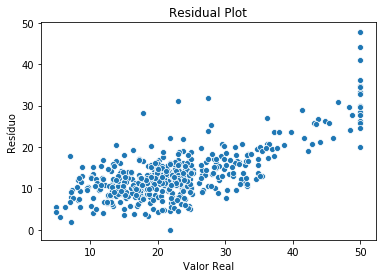

In [33]:
ax = sns.scatterplot(data=res, x="Valor Real", y="Resíduo")
ax.set_title("Residual Plot")